<h1 align="center">Heart Disease UCI</h1>

### Group ID:    204

Group Member: 
 
ASHUTOSH KUMAR (<2020fc04341@wilp.bits-pilani.ac.in>)

ASHWINI B R    (<2020fc04180@wilp.bits-pilani.ac.in>)

RAHUL PAUL     (<2020fc04350@wilp.bits-pilani.ac.in>)

# Contents 

### Part A 
#### Introduction<a id=18></a>
1.	[Import Libraries/Dataset](#23)
    - 1.1 [Download the dataset](#2)
    - 1.2 [Import the required libraries](#3)

2.	[Data Visualization and Exploration](#4)
    - 2.1 [Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.](#5)
    - 2.2 [Print the description and shape of the dataset.](#6)
    - 2.3 [Provide appropriate visualization to get an insight about the dataset.](#7)
    - 2.4 [Try exploring the data and see what insights can be drawn from the dataset.](#8)

3.	[Data Pre-processing and cleaning](#9)
    - 3.1 [Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.](#10)
    - 3.2 [Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.](#11)
    - 3.3 [Do the correlational analysis on the dataset. Provide a visualization for the same.](#12)

4.	[Data Preparation](#13)
    - 4.1 [Do the final feature selection and extract them into Column X and the class label into Column into Y.](#14)
    - 4.2 [Split the dataset into training and test sets.](#15)

### Part B 
1.	[Model Building](#16)
    - 1.1 [Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.](#16)
    - 1.2 [Train the model and print the training accuracy and loss values.](#16)

2.	[Performance Evaluation](#20)
    - 2.1 [Print the confusion matrix. Provide appropriate analysis for the same.](#21)
    - 2.2 [Do the prediction for the test data and display the results for the inference.](#22) 
    
[Appendix](#24)

## Part A 

### Introduction 

#### Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient {0 = Female, 1 = Male}

`cp` - Chest pain type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)

`trestbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - fasting blood sugar (1 = True, 0 = False)

`restecg` - Resting electrocardiographic results (0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)

`thalach` - Maximum heart rate achieved

`exang` - Exercise induced angina (1=Yes, 0=No)

`oldpeak` - ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

`slope` - Slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia (according to this research paper on NCBI: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7027664/)

`ca` - Number of major vessels (0-3) colored by flourosopy
The major cardial vessels are: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

Radioactive dye is introduced to the body followed by x-ray imaging to detect any structural abnormalities present in the heart. The quantity of vessels colored is positively correlated with presence of heart disease.

`thal` - 1 = normal, 2 = fixed defect (heart tissue can't absorb thallium both under stress and in rest), 3 = reversable defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

Thallium testing is a method where the radioactive element thallium (Tl) is introduced to the body through an IV injection, followed by nuclear imaging of the heart with a gamma camera which reveals structural issues and abnormalities of the heart by showing whether if the isotope was absorbed by heart tissue under high (exercise) and low (rest) stress conditions.

`target` - The target variable and predicted attribute (0 = less chance of heart attack; 1 = more chance of heart attack)



#### Objective <a id=3></a>
To perform EDA, build, train and evaluate Machine Learning model's on the given dataset inorder to predict if a person is prone to a heart attack or not.

## 1.	Import Libraries/Dataset <a id=23></a>
1.	Download the dataset
2.  Import the required libraries


### 1.1 Download the dataset <a id=2></a>
DATASET Source: https://www.kaggle.com/ronitf/heart-disease-uci

In [161]:
import os
import pandas as pd
#os.chdir(r"E:\Data_Science_WILP\Second_Semester\Assignment\ML")
df = pd.read_csv("heart.csv")

### 1.2 Import the required libraries <a id=3></a>

In [162]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Metrics
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Feature Selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2


print('Packages imported...')

Packages imported...


## 2.	Data Visualization and Exploration <a id=4></a>
1.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
2.	Print the description and shape of the dataset.
3.	Provide appropriate visualization to get an insight about the dataset.
4.	Try exploring the data and see what insights can be drawn from the dataset.


### 2.1 Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them. <a id=5></a>

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.2 Print the description and shape of the dataset.<a id=6></a>

##### 2.2.1 Shape of the Dataset

In [164]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


##### 2.2.2 Checking the number of unique values in each column

In [165]:
dict1 = {}
for i in list(df.columns):
    dict1[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict1,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


##### 2.2.3 Checking the data types in each column

In [166]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [167]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### 2.2.4 Checking duplicate rows in dataframe

In [168]:
#Check duplicate rows in data
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape[0])

Number of duplicate rows ::  1


##### 2.2.5 Separating the columns in categorical and continuous

In [169]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
con_cols = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = ["target"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
The continuous cols are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['target']


##### 2.2.6 Summary statistics

In [170]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### 2.2.7 Missing values

In [171]:
#print(df.isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Observations
1. There are no missing values.
2. There is one duplicate rows.
3. Standard Deviation of `chol` feature is high.
4. 13 integer & 1 float type of feature columns are available.

[back to top](#18)

### 2.3 Provide appropriate visualization to get an insight about the dataset. <a id=7></a>

#### 2.3.1 Univariate Analysis <a id=9></a>

##### 2.3.1.1 Count plot of target

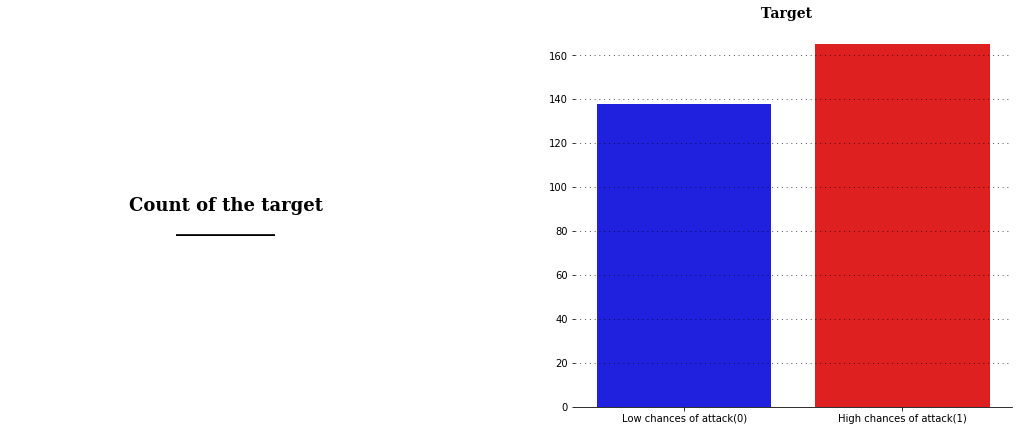

In [172]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = {0:'blue', 1:'red'}

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Target",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'target',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### Observations
It is seen that the given data has almost equal distribution for both the classes of the Target Variable ie ( Low chances of Heart Attack and High chances of Heart Attack). 

Thus, there is no bias in the given data.

##### 2.3.1.2 Count plot of categorical features

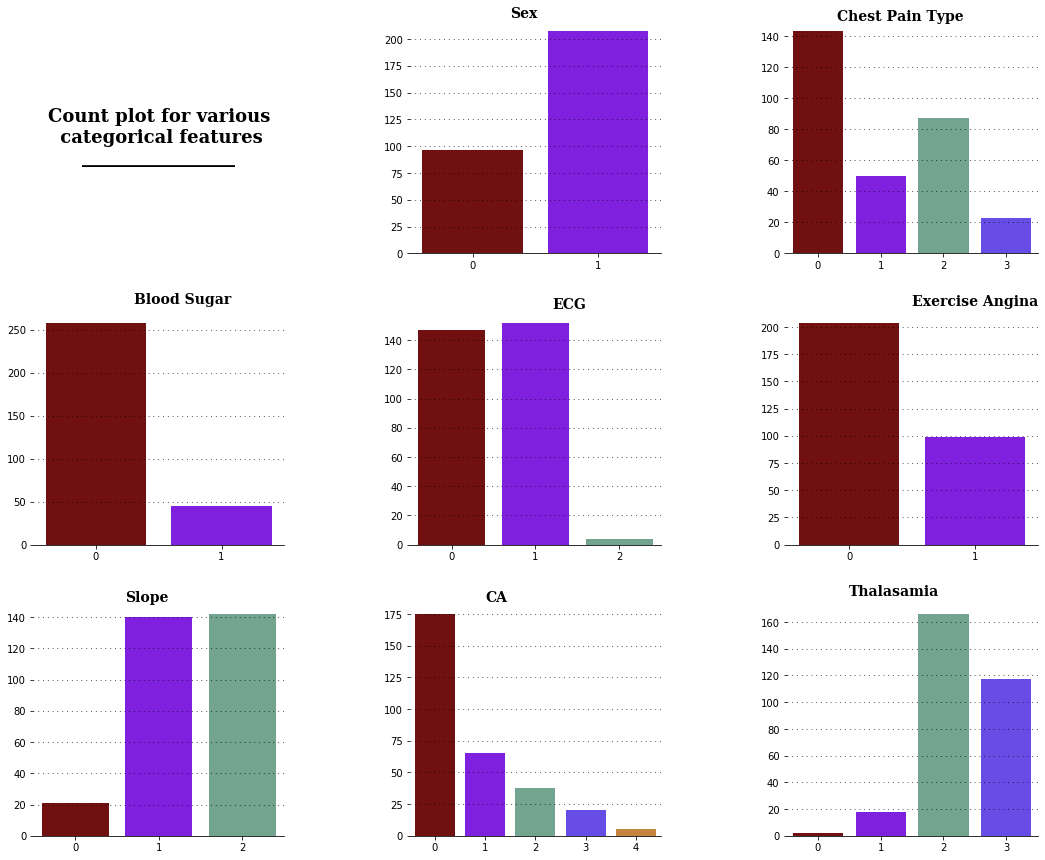

In [173]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
#cat_cols = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# CP_Type count
ax2.text(0.3, 150, 'Chest Pain Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='cp',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodSugar count
ax3.text(0.3, 280, 'Blood Sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='fbs',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# ECG count
ax4.text(1.2, 162, 'ECG', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='restecg',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# ExerciseAngia count
ax5.text(0.5, 220, 'Exercise Angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='exang',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slope
ax6.text(0.6, 150, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='slope',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# ca
ax7.text(1.0, 185, 'CA', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='ca',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalasamia
ax8.text(0.5, 180, 'Thalasamia', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thal',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")
#'''
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

##### Observations
1. The given dataset has almost double the count of data for "Male" as compared to "Female"
2. The counts for Chest pain type is distributed across all 4 types and is relatively higher for "Typical Angina"
3. Majority of the data available indicates "Non-Diabetic" condition.
4. The available data mostly has the ECG results as "0 = Normal" or "1 = ST-T wave normality"
5. 1/3 of the records in the datasets indicates the presence of "Exercise Angina" while 2/3 indicates No "Exercise Angina"
6. Majority of the data shows "Flat" and "Downsloping" patterns for the slope of peak exercise ST segment
7. The color test results in the given data set indicates decreasing counts for increasing number of major vessels blockage.
8. Thallium Test results is seen to have high frequency for labels 2 and 3, indicating some inability of the heart tissue to abosort thallium.  

##### 2.3.1.3 Boxen plot of continuous features

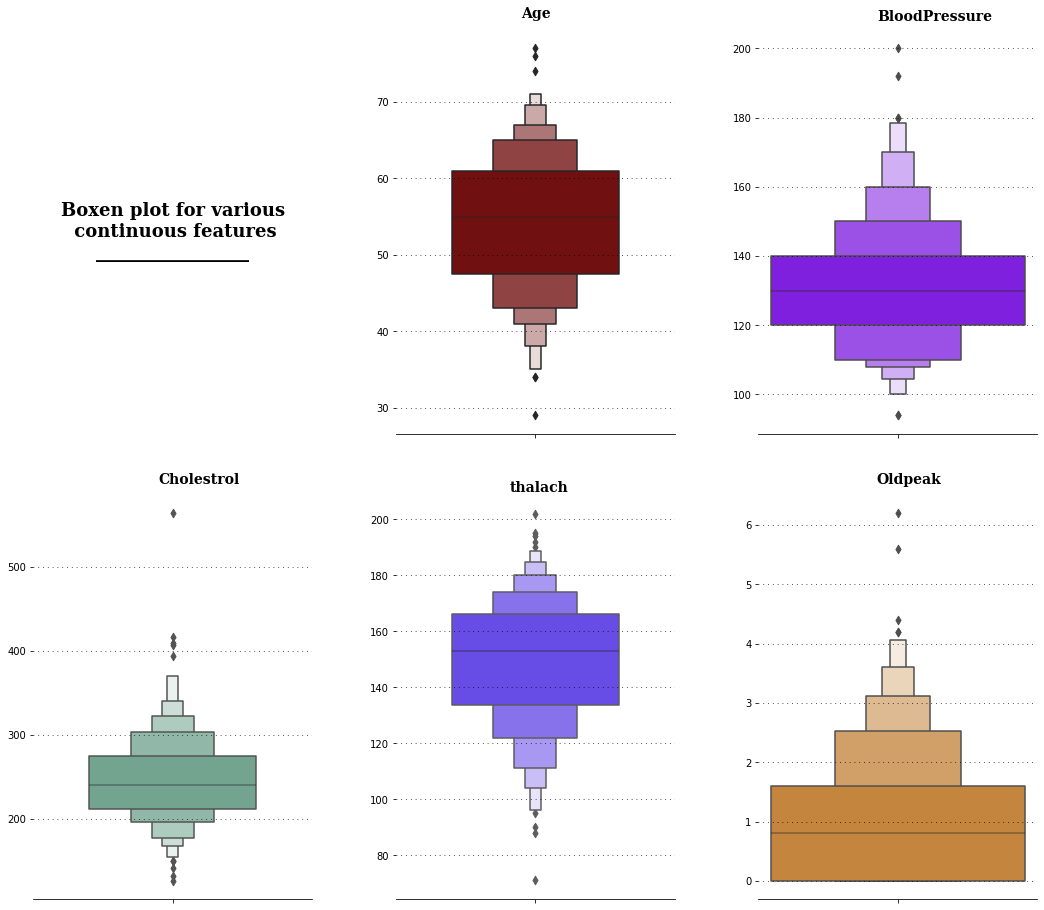

In [174]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
#'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# BloodPressure 
ax2.text(-0.05, 208, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trestbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.autoscale_view(True)

# Cholestrol 
ax3.text(-0.05, 600, 'Cholestrol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# MaxHeartRate 
ax4.text(-0.09, 210, 'thalach', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# FamilyHistory 
ax5.text(-0.05, 6.7, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.autoscale_view(True)

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### Observations
1. Outlier data is observed for "Cholestrol" and "Oldpeak" attribute
2. The mean value, skewness is observed and noted for the attributes

[back to top](#18)

### 2.4 Try exploring the data and see what insights can be drawn from the datase <a id=8></a> 

#### 2.4.1 Count plot of Target Variable for Continous Data

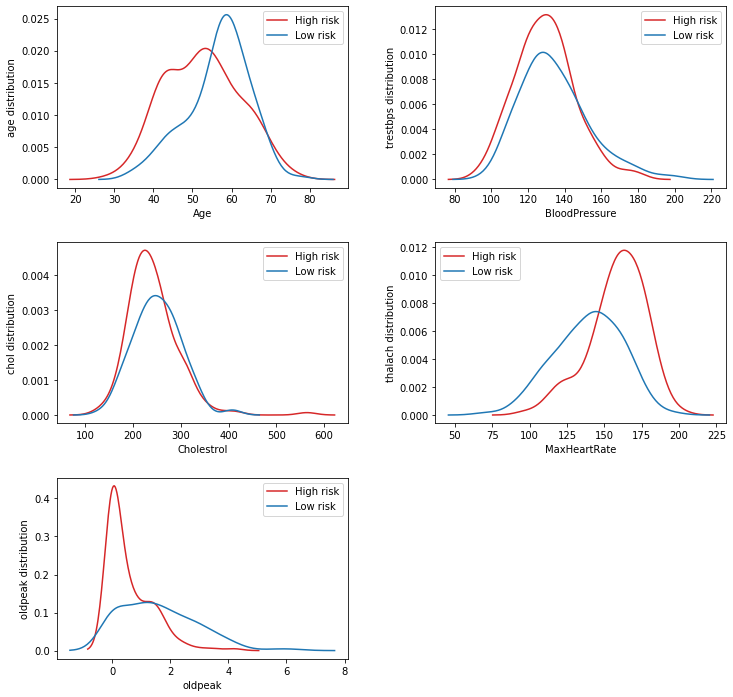

In [175]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
#'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
sns.kdeplot(ax=ax0,data = df, hue = 'target', bw_adjust = 1, x = 'age', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax1,data = df, hue = 'target', bw_adjust = 1, x = 'trestbps', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax2,data = df, hue = 'target', bw_adjust = 1, x = 'chol', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax3,data = df, hue = 'target', bw_adjust = 1, x = 'thalach', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax4,data = df, hue = 'target', bw_adjust = 1, x = 'oldpeak', palette = ['tab:blue', 'tab:red'])
#sns.countplot(ax=ax4,data = df, x = 'oldpeak', hue = 'target', palette = ['tab:blue', 'tab:red'])
ax0.legend(["High risk", "Low risk"])
ax1.legend(["High risk", "Low risk"])
ax2.legend(["High risk", "Low risk"])
ax3.legend(["High risk", "Low risk"])
ax4.legend(["High risk", "Low risk"])
ax0.set(xlabel = 'Age', ylabel = 'age distribution')
ax1.set(xlabel = 'BloodPressure', ylabel = 'trestbps distribution')
ax2.set(xlabel = 'Cholestrol', ylabel = 'chol distribution')
ax3.set(xlabel = 'MaxHeartRate', ylabel = 'thalach distribution')
ax4.set(xlabel = 'oldpeak', ylabel = 'oldpeak distribution')
plt.show()

##### Observations
Following difference in values and patterns of frequency distribution for the continuous attributed based on Target variable is observed:

1. There are certain outliers in all the continuous features.
2. According to the distribution plot of `thalach` wrt `target`, people with higher maximum heart rate achieved have higher chances of heart attack.
3. According to the distribution plot of `oldpeak` wrt `Target`, people with lower ST depression have higher chances of heart attack.

#### 2.4.2 Count plot of Target Variable for Categorical Data

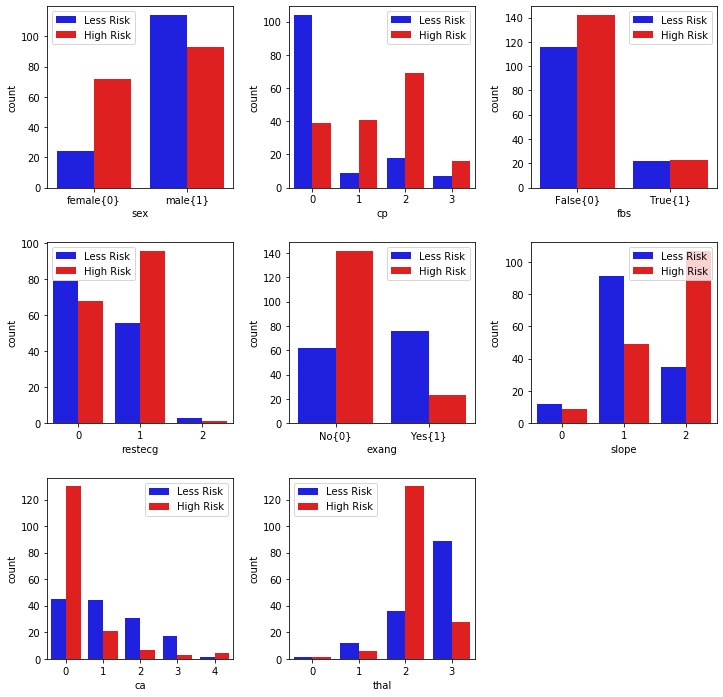

In [176]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
#'sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target'
hue_color = {0:'blue', 1:'red'}
sex = ['female{0}', 'male{1}']
sns.countplot(ax=ax0,data = df, x = 'sex', hue = 'target', palette = hue_color)
ax0.set_xticklabels(labels = sex)
ax0.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax1,data = df, x = 'cp', hue = 'target', palette = hue_color)
ax1.legend(['Less Risk', 'High Risk'])

bs = ['False{0}', 'True{1}']
sns.countplot(ax=ax2,data = df, x = 'fbs', hue = 'target', palette = hue_color)
ax2.set_xticklabels(labels = bs)
ax2.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax3,data = df, x = 'restecg', hue = 'target', palette = hue_color)
ax3.legend(['Less Risk', 'High Risk'])

ea = ['No{0}', 'Yes{1}']
sns.countplot(ax=ax4,data = df, x = 'exang', hue = 'target', palette = hue_color)
ax4.set_xticklabels(labels = ea)
ax4.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax5,data = df, x = 'slope', hue = 'target', palette = hue_color)
ax5.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax6,data = df, x = 'ca', hue = 'target', palette = hue_color)
ax6.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax7,data = df, x = 'thal', hue = 'target', palette = hue_color)
ax7.legend(['Less Risk', 'High Risk'])

plt.show()

#### Observations
The categorical count plot tells about the following:
1. From `sex`, Female{0} have higher chances of heart attack.
2. People with chest pain, that is with `CP_Type` = 2 have higher chances of heart attack.
3. People with `BloodSugar` = 0 have much higher chance of heart attack.
4. People with `restecg` = 1 have high chance of heart attack.
5. People with no exercise induced angina, that is with `exang` = 0 have higher chance of heart attack.
6. People with`slope` = 2 (downsloping) have higher chances of heart attack.
7. People with `ca` = 0 have higher chances of heart attack.
8. People with `thal` = 2 have higher chances of heart attack.

#### 2.4.3 Target Variable using Pair lot

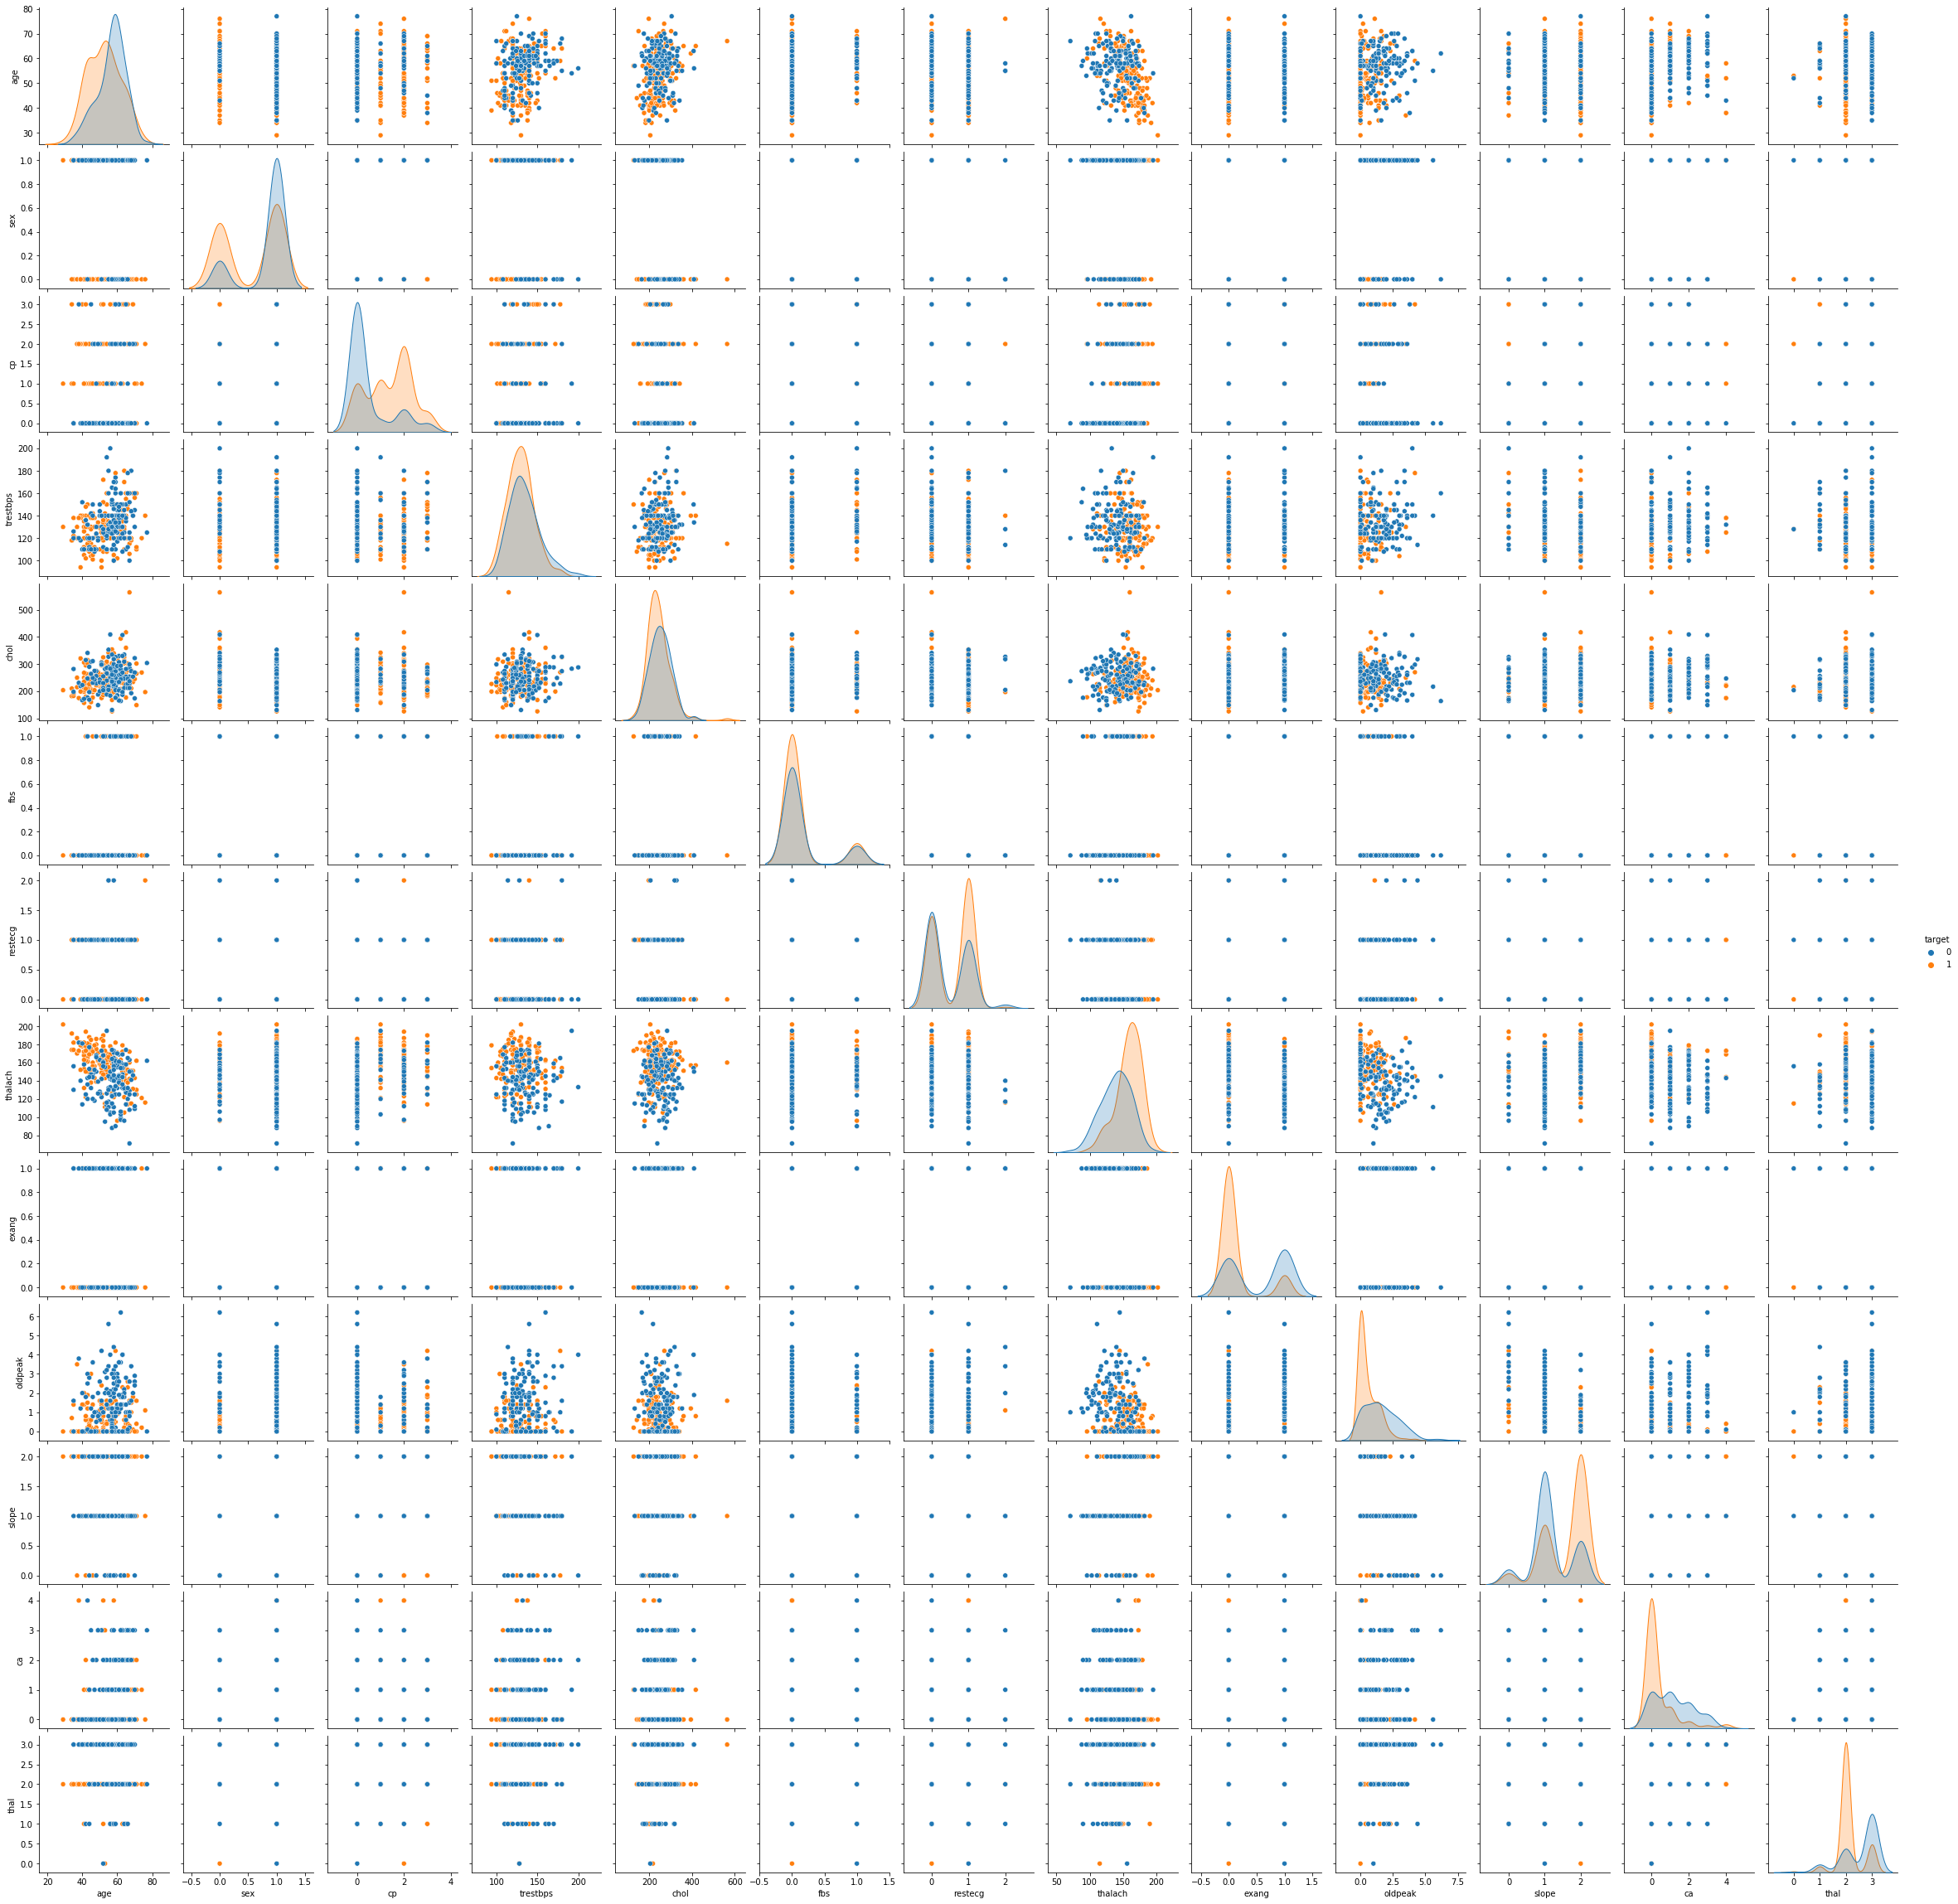

In [177]:
contdata = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].copy()

sns.pairplot(contdata,hue = 'target')
plt.show()

[back to top](#18)

## 3 Data Pre-processing and cleaning <a id=9></a>	
1.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.
2.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.
3.	Do the correlational analysis on the dataset. Provide a visualization for the same.


### 3.1 Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.<a id=10></a>

In [178]:
#Remove Duplicate Rows
df.drop_duplicates(keep=False,inplace=True)

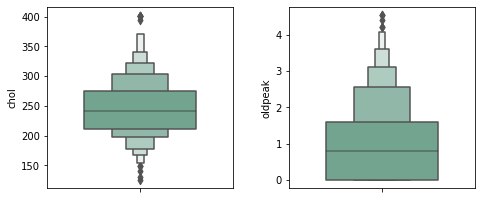

In [179]:
#Remove outliers for 'Chol' & 'oldpeak' column and replace with mean
mean = df["chol"].mean()
sd = df["chol"].std()
leftVal = mean - 3*sd
rightVal = mean + 3*sd
df.loc[df["chol"] > rightVal, "chol"] = rightVal
mean_old = df["oldpeak"].mean()
sd_old = df["oldpeak"].std()
leftVal_old = mean_old - 3*sd_old
rightVal_old = mean_old + 3*sd_old
df.loc[df["oldpeak"] > rightVal_old, "oldpeak"] = rightVal_old
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
sns.boxenplot(y=df['chol'],ax=ax0,palette=["#6aac90"],width=0.6)
sns.boxenplot(y=df['oldpeak'],ax=ax1,palette=["#6aac90"],width=0.6)
plt.show()

### 3.2 Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.<a id=11></a>

In [180]:
# creating a copy of df
df1 = df.copy()
# define the columns to be encoded and scaled
cat_cols = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']
con_cols = ['age',  'trestbps', 'chol', 'thalach', 'oldpeak']
# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
# instantiating the scaler
scaler = RobustScaler()
# scaling the continuous feature
df1[con_cols] = scaler.fit_transform(df1[con_cols])

### 3.3 Do the correlational analysis on the dataset. Provide a visualization for the same.<a id=12></a>

##### 3.3.1 Correlation matrix of continuous features

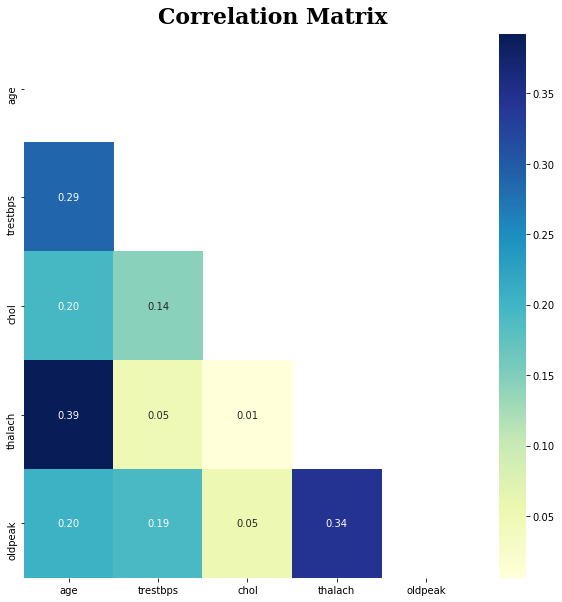

In [181]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
df_corr = df[con_cols].corr().abs().transpose()
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".2f",annot=True,cmap='YlGnBu')
plt.show()

##### 3.3.2 Scatterplot heatmap of dataframe

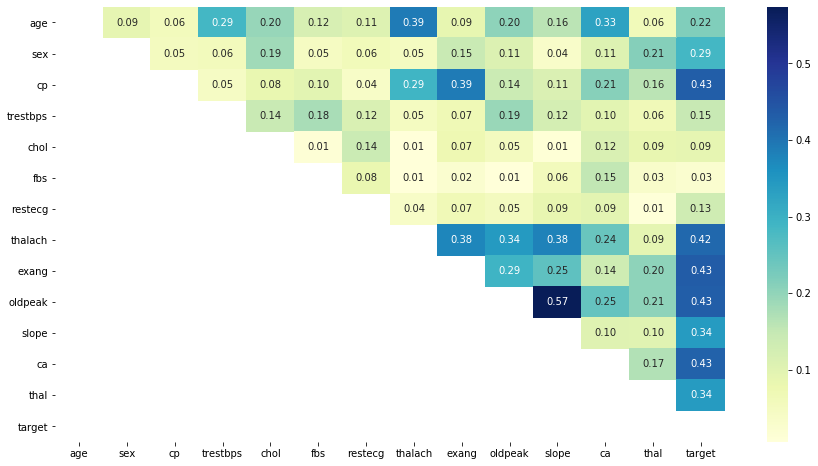

In [182]:
fig = plt.figure(figsize=(15,8))
df_corr = df.corr().abs().transpose()
mask = np.tril(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".2f",annot=True,cmap='YlGnBu')
plt.show()

#### Observations
Among all the feature, `trestbps`,`chol`,`fbs` & `restecg` shows less correlation compared to others.

[back to top](#18)

## 4. Data Preparation <a id=13></a>
1.	Do the final feature selection and extract them into Column X and the class label into Column into Y.
2.	Split the dataset into training and test sets.


### 4.1 Do the final feature selection and extract them into Column X and the class label into Column into Y.<a id=14></a>

##### 4.1.1 Information Gain

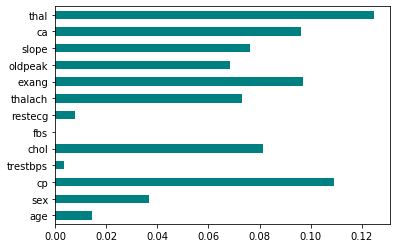

In [183]:
#Information Gain
%matplotlib inline
X1 = df.drop(['target'],axis=1)
y1 = df[['target']]
importances = mutual_info_classif(X1,y1)
ft_im = pd.Series(importances,df.columns[0:len(df.columns)-1])
ft_im.plot(kind='barh', color = 'teal')
plt.show()

#### 4.1.2 Chi-squared test for Categorical Data

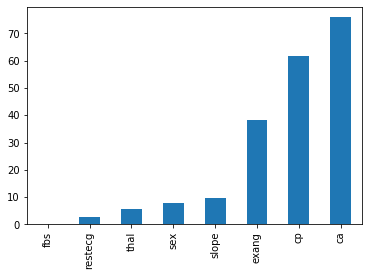

In [184]:
#Chi-squared test
cD = df[cat_cols].copy()
f_score = chi2(cD,y1)
p_values = pd.Series(f_score[0],index=cD.columns)
p_values.sort_values(ascending=True,inplace=True)
p_values.plot.bar()
plt.show()


#### 4.1.3 Making features model ready <a id=14></a>

In [185]:
# defining the features and target
X = df1.drop(['target'],axis=1)
y = df1[['target']]
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.538462,0.75,-0.125000,-0.060606,0.9375,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.461538,0.00,0.140625,1.060606,1.6875,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.153846,0.00,-0.578125,0.606061,0.3750,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.000000,-0.50,-0.078125,0.787879,0.0000,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.076923,-0.50,1.765625,0.333333,-0.1250,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 4.2 Split the dataset into training and test sets.<a id=15></a>

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (240, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (240, 1)
The shape of y_test is        (61, 1)


[back to top](#18)

# Part B  <a id=15></a>

## 1.	Model Building <a id=16></a>

1.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.
2.	 Train the model and print the training accuracy and loss values.


### 1.1	Training the model and printing the training accuracy<a id=16></a>




In [200]:
def eval_model(fn_classifier):
    print(f"    Train Accuracy : {accuracy_score(y_train, fn_classifier.predict(X_train)):.2%}")
    print(f'    f1 score: {f1_score(y_train, fn_classifier.predict(X_train)):.2%}')
    print(f'    precision score: {precision_score(y_train, fn_classifier.predict(X_train)):.2%}')
    print(f'    recall score: {recall_score(y_train, fn_classifier.predict(X_train)):.2%}')
    

dtree = DecisionTreeClassifier(max_depth = 5,random_state=42).fit(X_train, y_train)
svm_linear = SVC(kernel = 'linear', C = 1,random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)
lr = LogisticRegression(random_state=42).fit(X_train,y_train)
gbc = GradientBoostingClassifier(max_depth = 2,random_state=42).fit(X_train,y_train)
rfc = RandomForestClassifier(max_depth=5,random_state=42).fit(X_train,y_train)
print("="*50)
print("\033[1m"+"1. Decision Tree"+"\033[0m")
eval_model(dtree)
print("="*50)
print("\033[1m"+"2. SVM Linear"+"\033[0m")
eval_model(svm_linear)
print("="*50)
print("\033[1m"+"3. k-nearest neighbours classifier"+"\033[0m")
eval_model(knn)
print("="*50)
print("\033[1m"+"4. Naive Bayes classifier"+"\033[0m")
eval_model(gnb)
print("="*50)
print("\033[1m"+"5. Logistic Regression"+"\033[0m")
eval_model(lr)
print("="*50)
print("\033[1m"+"6. Gradient Boosting Classifier"+"\033[0m")
eval_model(gbc)
print("="*50)
print("\033[1m"+"7. Random Forest Classifier"+"\033[0m")
eval_model(rfc)
print("="*50)

1. Decision Tree
    Train Accuracy : 88.33%
    f1 score: 89.31%
    precision score: 88.64%
    recall score: 90.00%
2. SVM Linear
    Train Accuracy : 87.50%
    f1 score: 89.13%
    precision score: 84.25%
    recall score: 94.62%
3. k-nearest neighbours classifier
    Train Accuracy : 85.00%
    f1 score: 86.47%
    precision score: 84.56%
    recall score: 88.46%
4. Naive Bayes classifier
    Train Accuracy : 65.42%
    f1 score: 75.52%
    precision score: 61.24%
    recall score: 98.46%
5. Logistic Regression
    Train Accuracy : 88.75%
    f1 score: 89.81%
    precision score: 88.15%
    recall score: 91.54%
6. Gradient Boosting Classifier
    Train Accuracy : 95.00%
    f1 score: 95.45%
    precision score: 94.03%
    recall score: 96.92%
7. Random Forest Classifier
    Train Accuracy : 94.17%
    f1 score: 94.70%
    precision score: 93.28%
    recall score: 96.15%


#### Observations

`Logistic Regression`,`Gradient Boosting Classifier` & `Random Forest Classifier` are the best performing models among all the seven classifier models which we have validated. <br>
Note: Train Accuracy of Gradient Boosting and Random Forest Classifier are high, to avoid overfitting, a value is assigned to max_depth. (Details in appendix)

[back to top](#18)

## 2.	Performance Evaluation <a id=20></a>
1.	Print the confusion matrix. Provide appropriate analysis for the same.
2.	Do the prediction for the test data and display the results for the inference. 



## 2.1	Confusion matrix (Normalized)<a id=21></a>

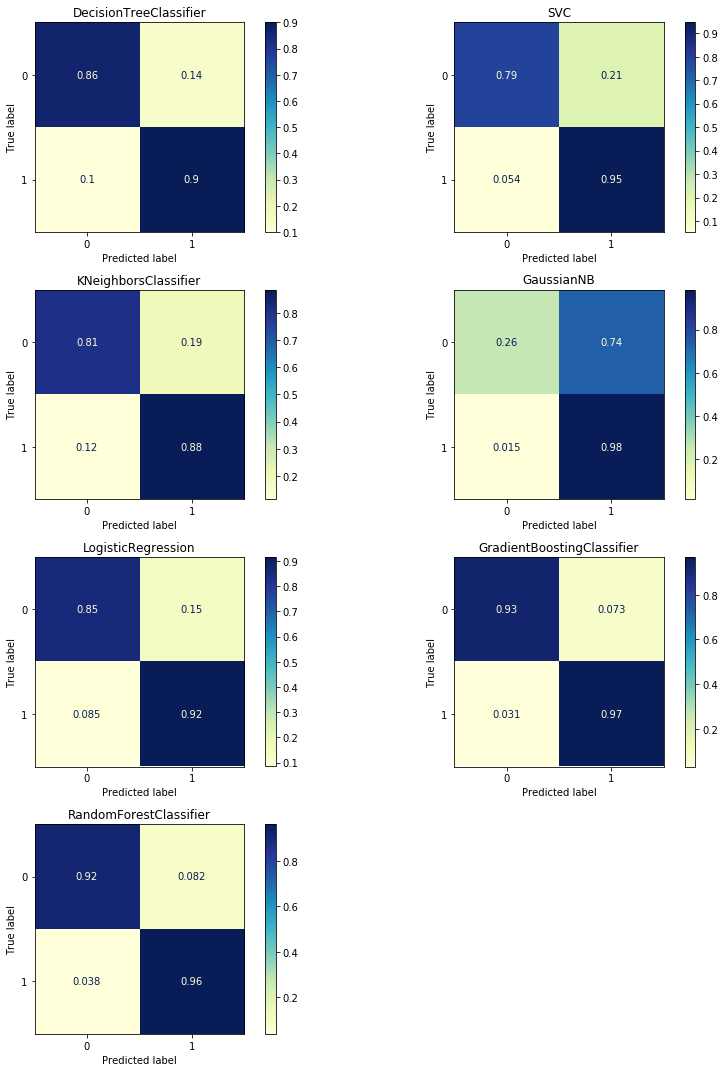

In [188]:
classifiers = [DecisionTreeClassifier(max_depth = 5,random_state=42),SVC(kernel = 'linear', C = 1,random_state=42),
               KNeighborsClassifier(n_neighbors = 7),GaussianNB(),LogisticRegression(random_state=42),
               GradientBoostingClassifier(max_depth = 2,random_state=42),RandomForestClassifier(max_depth=5,random_state=42)]
for cls in classifiers:
    cls.fit(X_train, y_train)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,15))
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
axes = trim_axs(axes, len(classifiers))
for cls, ax in zip(classifiers, axes):
    plot_confusion_matrix(cls, 
                          X_train, 
                          y_train,normalize='true', 
                          ax=ax, 
                          cmap='YlGnBu')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

## 2.2 Prediction for the test data<a id=22></a>

### 2.2.1	Prediction Performed with top three models<a id=16></a>

In [189]:
def evaltest_model(fn_classifier):
    print(f"    Test Accuracy : {accuracy_score(y_test, fn_classifier.predict(X_test)):.2%}")
    print(f'    f1 score: {f1_score(y_test, fn_classifier.predict(X_test)):.2%}')
    print(f'    precision score: {precision_score(y_test, fn_classifier.predict(X_test)):.2%}')
    print(f'    recall score: {recall_score(y_test, fn_classifier.predict(X_test)):.2%}')

print("="*50)
print("\033[1m"+"1. Logistic Classifier"+"\033[0m")
evaltest_model(lr)
print("="*50)
print("\033[1m"+"2. Gradient Boosting Classifier"+"\033[0m")
evaltest_model(gbc)
print("="*50)
print("\033[1m"+"3. Random Forest Classifier"+"\033[0m")
evaltest_model(rfc)
print("="*50)

1. Logistic Classifier
    Test Accuracy : 85.25%
    f1 score: 86.57%
    precision score: 85.29%
    recall score: 87.88%
2. Gradient Boosting Classifier
    Test Accuracy : 81.97%
    f1 score: 83.58%
    precision score: 82.35%
    recall score: 84.85%
3. Random Forest Classifier
    Test Accuracy : 83.61%
    f1 score: 85.29%
    precision score: 82.86%
    recall score: 87.88%


### 2.2.2	Confusion matrix test data<a id=16></a>

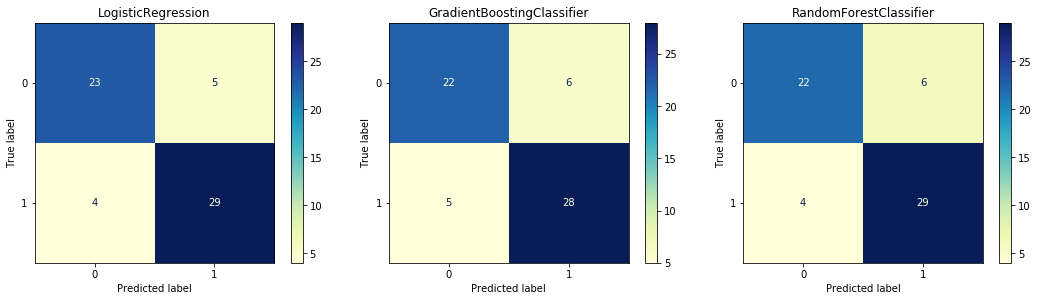

In [190]:
classifiers = [LogisticRegression(random_state=42),
               GradientBoostingClassifier(max_depth = 2,random_state=42),RandomForestClassifier(max_depth=5,random_state=42)]
for cls in classifiers:
    cls.fit(X_train, y_train)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
axes = trim_axs(axes, len(classifiers))
for cls, ax in zip(classifiers, axes):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='YlGnBu')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

### Conclusions

1. For a good ML Model, values of Accuracy, Precision, Recall & f1-score should be as high as possible and from the confusion matrix, it is observed that Accuracy, Precision, Recall & f1-score of `Logistic Regression` is higher compared to `Gradient Boosting Classifier` & `Random Forest Classifier`. <br>
2. Also out of the three model, the difference between accuracy & f1-score of train & test data sample is minimum for `Logistic Regression`, thus it is recommended. 

[back to top](#18)

# Appendix<a id=21></a>

#### Hyperparameter Tuning of Random Forest Classifier

In [191]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'random_state': [0,42]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                   

In [192]:
print("Random Forest Score:" ,grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

Random Forest Score: 0.8
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


In [193]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
21,thal_3,0.139620
4,oldpeak,0.138622
20,thal_2,0.128959
3,thalach,0.108421
0,age,0.077986
12,exang_1,0.067373
14,slope_2,0.063554
7,cp_2,0.048053
2,chol,0.042647
1,trestbps,0.036154


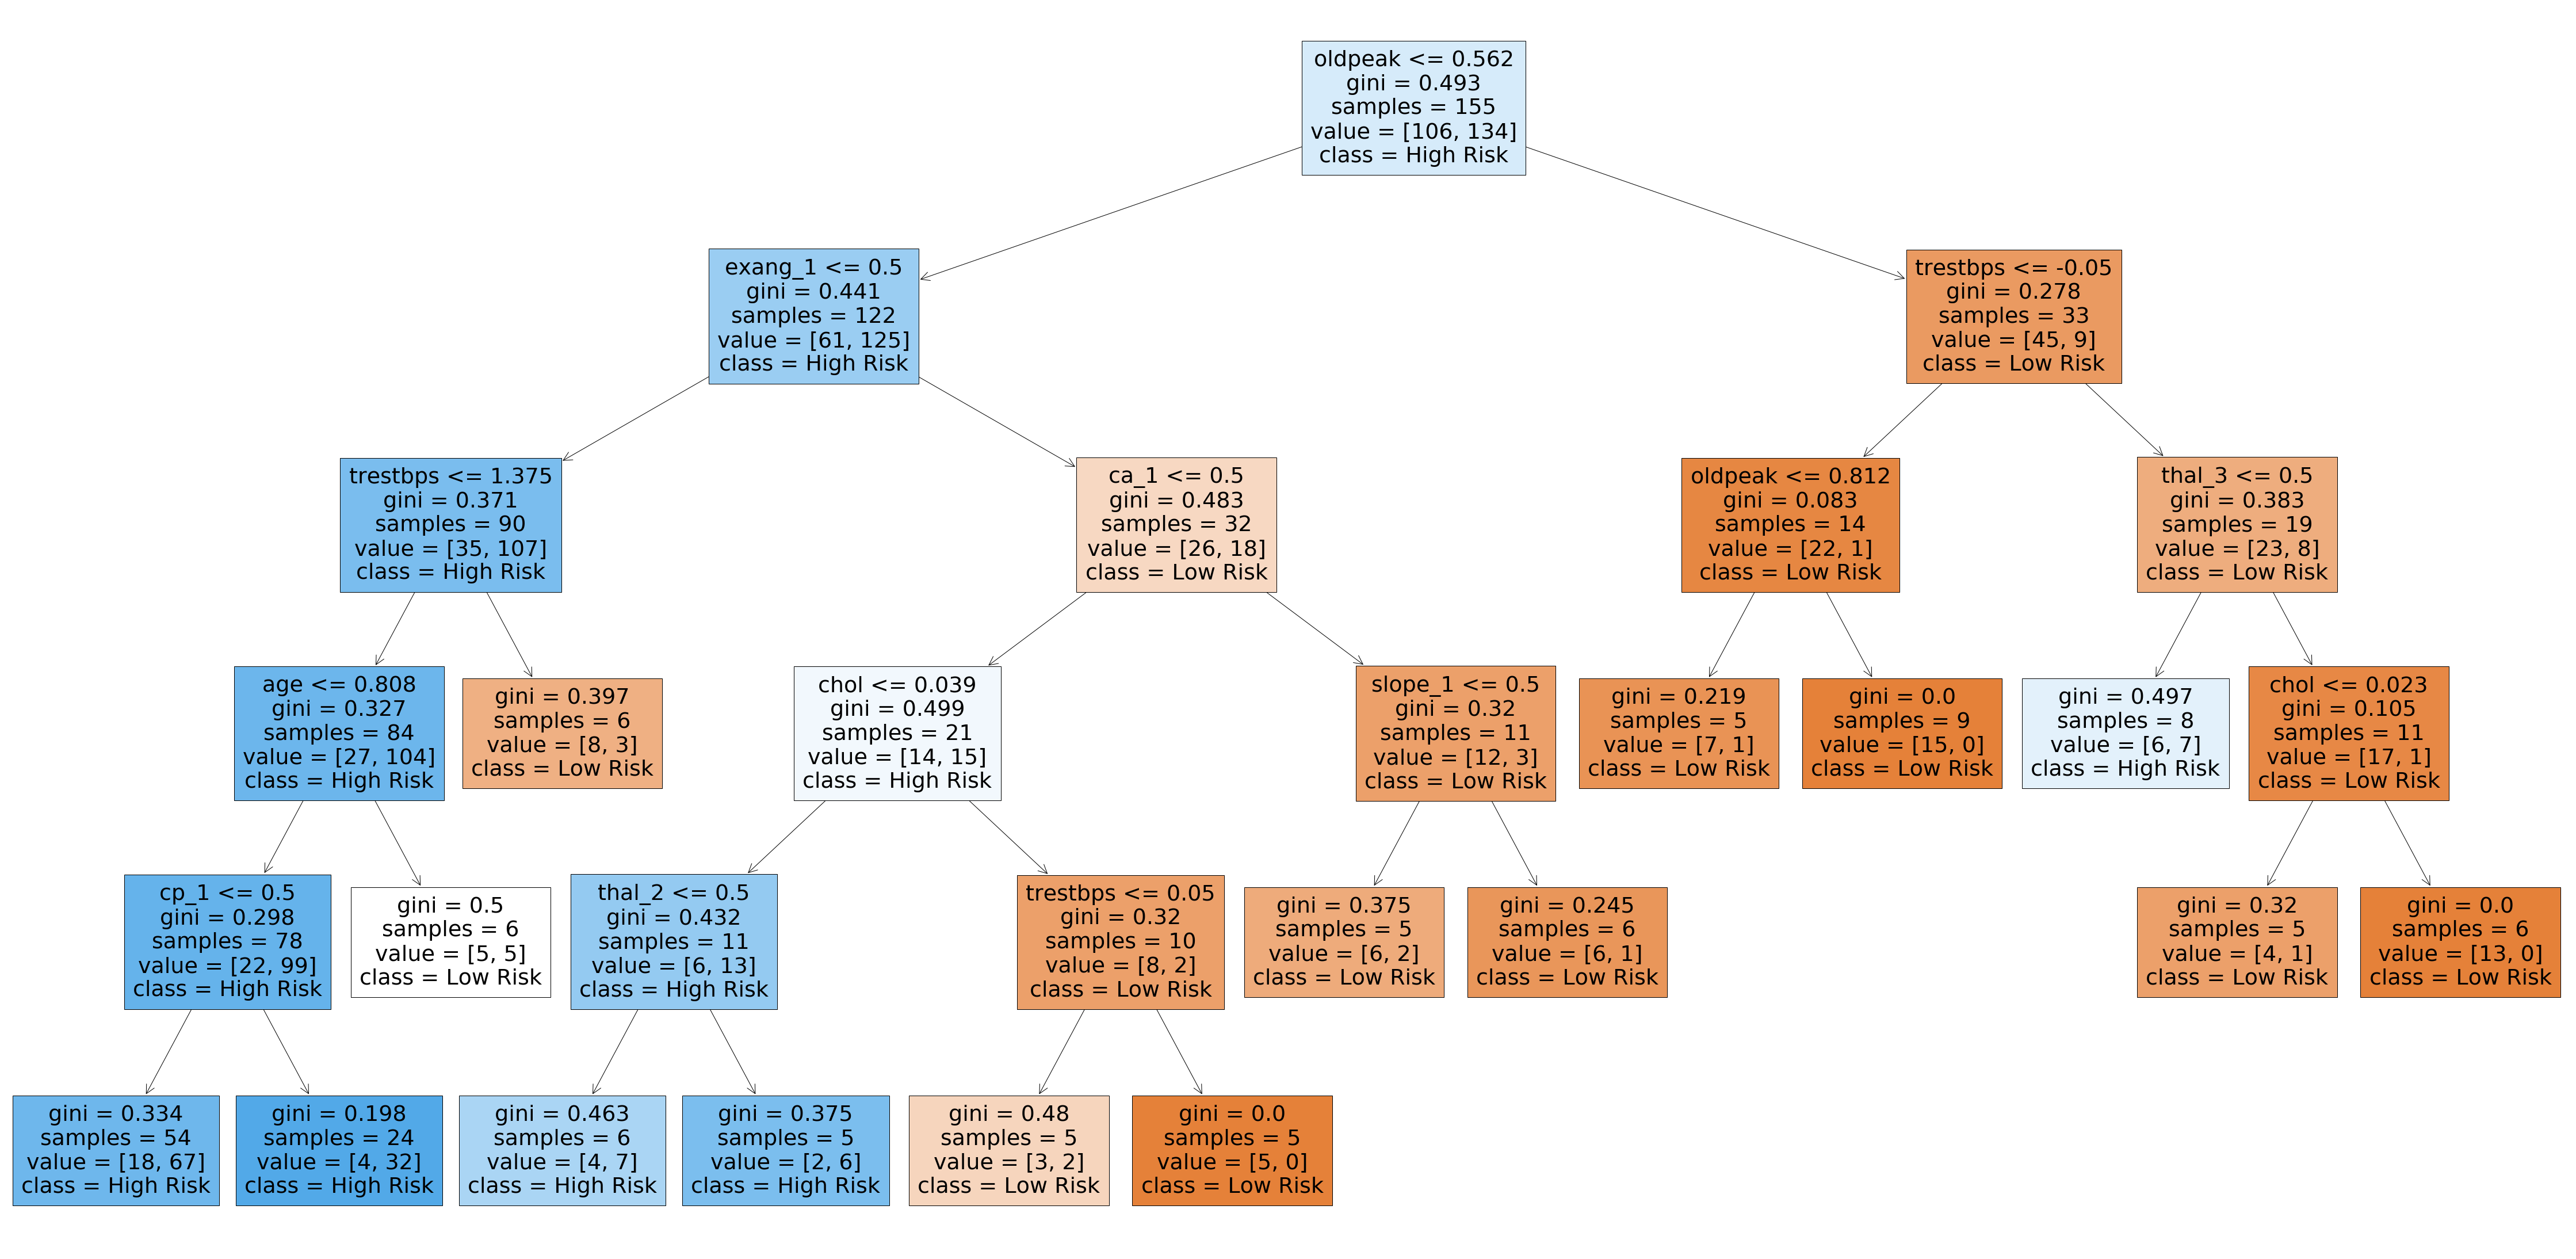

In [194]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Low Risk', "High Risk"],filled=True);

### Hyperparameter Tuning of Logistic Regression

In [195]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print(logreg_cv.best_estimator_)

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.8333333333333334
LogisticRegression(C=2275.845926074791, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Overfitting Validation

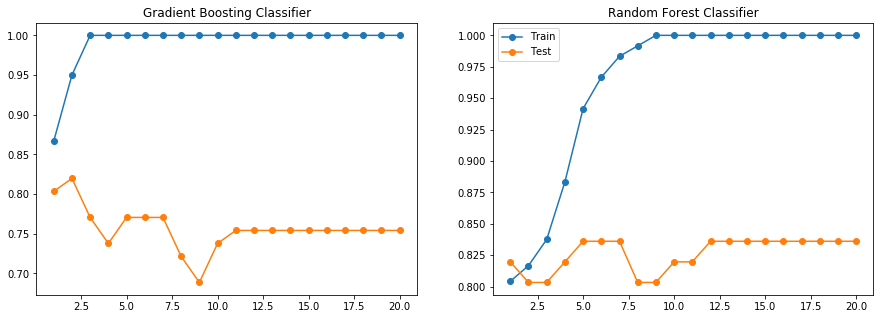

In [196]:
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
train_scores = []
test_scores = []
rftrain_scores = []
rftest_scores = []
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=i,random_state=42)
    rfmodel = RandomForestClassifier(max_depth=i,random_state=42)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    rfmodel.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    rftrain_yhat = rfmodel.predict(X_train)
    rftrain_acc = accuracy_score(y_train, rftrain_yhat)
    rftrain_scores.append(rftrain_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    rftest_yhat = rfmodel.predict(X_test)
    rftest_acc = accuracy_score(y_test, rftest_yhat)
    rftest_scores.append(rftest_acc)
    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1)
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title("Gradient Boosting Classifier")
plt.subplot(1, 2, 2)
plt.plot(values, rftrain_scores, '-o', label='Train')
plt.plot(values, rftest_scores, '-o', label='Test')
plt.title("Random Forest Classifier")
plt.legend()
plt.show()

### Feature Importance of Classifier

In [197]:
importance = rfc.feature_importances_
print("Feature importance table from Random Forest Classifier\n")
# summarize feature importance
for i,v in enumerate(importance):
    print(X.columns[i], ':', round((v*100),2), '%')
print("                                    ")   
print("                                    ")  
importance1 = gbc.feature_importances_
print("Feature importance table from Gradient Boosting Classifier\n")
# summarize feature importance
for i1,v1 in enumerate(importance1):
    print(X.columns[i1], ':', round((v1*100),2), '%')

Feature importance table from Random Forest Classifier

age : 8.15 %
trestbps : 5.36 %
chol : 6.18 %
thalach : 10.72 %
oldpeak : 14.31 %
sex_1 : 2.75 %
cp_1 : 1.45 %
cp_2 : 4.84 %
cp_3 : 1.32 %
fbs_1 : 0.69 %
restecg_1 : 0.71 %
restecg_2 : 0.07 %
exang_1 : 6.04 %
slope_1 : 2.86 %
slope_2 : 5.65 %
ca_1 : 2.23 %
ca_2 : 2.91 %
ca_3 : 1.27 %
ca_4 : 0.02 %
thal_1 : 0.51 %
thal_2 : 10.55 %
thal_3 : 11.4 %
                                    
                                    
Feature importance table from Gradient Boosting Classifier

age : 7.07 %
trestbps : 1.96 %
chol : 3.78 %
thalach : 9.75 %
oldpeak : 17.8 %
sex_1 : 2.73 %
cp_1 : 0.97 %
cp_2 : 4.58 %
cp_3 : 0.45 %
fbs_1 : 0.16 %
restecg_1 : 0.15 %
restecg_2 : 0.0 %
exang_1 : 8.09 %
slope_1 : 2.23 %
slope_2 : 1.85 %
ca_1 : 3.77 %
ca_2 : 3.62 %
ca_3 : 2.35 %
ca_4 : 0.0 %
thal_1 : 0.0 %
thal_2 : 22.3 %
thal_3 : 6.38 %


### ROC Logistic Regression

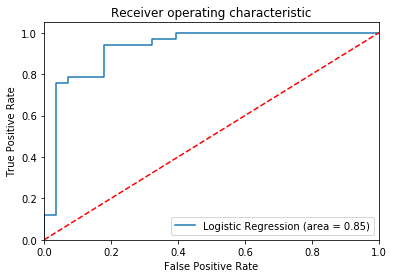

In [198]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[back to top](#18)